# 图像特征提取与描述

## 图像特征：

    要有区分性，比较容易比较，一般认为角点、斑点是比较好的图像特征
    
    特征检测：找到图像中的特征；角点是图像一个重要的特征
    
    特征描述：对特征以及他周围的区域进行描述


1. Harriss算法

思想： 通过图像的局部最小窗口观察图像，角点的特征是沿任意方向移动都会导致图像灰度明显变化

优点：旋转不变性；对图像和灰度的仿射有部分不变性

确定：对尺度敏感，不具有几何不变 性角点像素级

2. Shi-tomas算法

对Harriss的改进，更高检测角点

In [1]:
## Harris角点特征检测

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

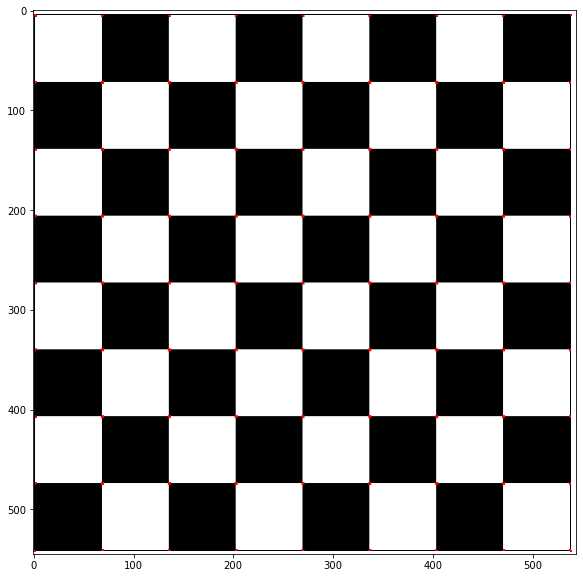

In [8]:
# 图像读取
img = cv.imread('../imageProcessing/image/chessboard.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
img[dst>0.001*dst.max()] = [0,0,255]
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])

In [13]:
# Shi-Tomasi角点检测

# 读取图像
img = cv.imread('../imageProcessing/image/tv.jpg')
# 转化为灰度图
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# 开始角点检测
coners = cv.goodFeaturesToTrack(gray,maxCorners=1000,qualityLevel=0.01,minDistance=10)


In [19]:
for i in coners:
    x,y = i.ravel()
    x= int(x)
    y = int(y)    
    cv.circle(img,(x,y),2,(0,0,255),-1)


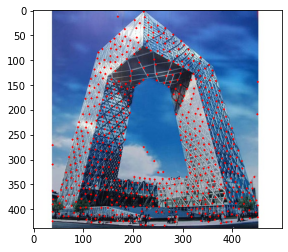

In [20]:
plt.imshow(img[:,:,::-1])


## SIFT算法

1. 尺度空间极值检测：搜索所有尺度上的图像位置，通过高斯差分函数来识别潜在的对尺度和旋转不变的关键点

    使用尺度空间滤波器，对小的关键点使用小的窗口，大的关键点使用大的窗口（高斯核是唯一可以产生多尺度空间的核函数）

    尺度空间看作原始图像和一个可变尺度的二维高斯函数的卷积运算

2. 关键点定位：在每个候选的位置上，通过一个拟合精细的模型来确定位置和尺度，关键点的选择依据于他们的稳定程度

    局部极值点进行进一步检验，去除噪声和边缘的影响


3. 关键点方向确定：基于图像局部的梯度方向，分配给每个关键点位置一个或者多个方向，所有后面的对图像数据的操作都相对于关键点的方向、尺度和位置进行变换，从而保证了对于这些变换的不变性

    为实现旋转不变性

4. 关键点描述：在每个关键点周围的邻域内，在选定的尺度上测量图像局部的梯度。这些梯度作为关键点的描述符，它允许比较大的局部形状的变形或者光照变化

总之 在图像的不变特征提取方面有优势，但是实时性不高，有的特征点较少，对边缘光滑的目标无法准确提取特征点

SURF算法作为一种改进算法



In [21]:
# 读取图像
img = cv.imread('../imageProcessing/image/tv.jpg')
# 转化为灰度图
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


In [23]:
# 创建sift对象
sift = cv.SIFT_create()

In [24]:
kp,des = sift.detectAndCompute(gray,None)

In [26]:
# 进行图像绘制
cv.drawKeypoints(img,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

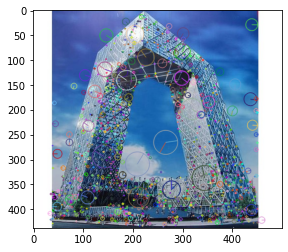

In [27]:
plt.imshow(img[:,:,::-1])

## Fast算法

解决实时处理问题

原理：取图像中的检测点，以该点为圆心的邻域内像素点判断监测点是不是角点
 

In [30]:
# 读取图像
img = cv.imread('../imageProcessing/image/tv.jpg')

In [31]:
fast = cv.FastFeatureDetector_create(threshold=30)

In [32]:
kp = fast.detect(img,None)

In [33]:
# 关键点绘制
img2 = cv.drawKeypoints(img,kp,None,color=(0,0,255))

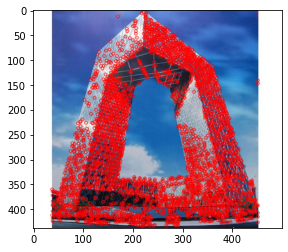

In [34]:
plt.imshow(img2[:,:,::-1])

In [35]:
# 去除非极大值抑制
fast.setNonmaxSuppression(0)

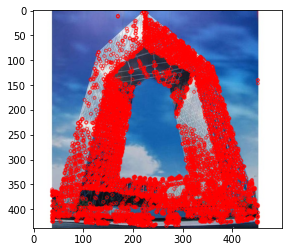

In [36]:
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img,kp,None,color=(0,0,255))
plt.imshow(img2[:,:,::-1])

## ORB算法

Fast和BRIEF算法的结合

In [48]:
# 读取图像
img = cv.imread('../imageProcessing/image/tv.jpg')

In [49]:
orb = cv.ORB_create(nfeatures=1000)

In [50]:
kp, des = orb.detectAndCompute(img,None)

In [51]:
des.shape

(1000, 32)

In [52]:
img2 = cv.drawKeypoints(img,kp,None,flags=0)

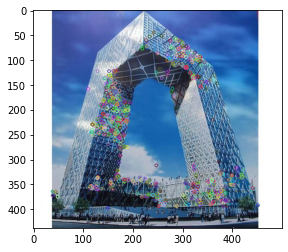

In [53]:
plt.imshow(img2[:,:,::-1])